**Loan Prediction**

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings



**Reading data**

In [14]:
train = pd.read_csv('/content/train_ctrUa4K.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
test = pd.read_csv('/content/test_lAUu6dG.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


**Creating backup dataframes**

In [16]:
train_original=train.copy()
test_original=test.copy()

**Understanding the Data**

In [17]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

12 independent variables and 1 target variable, i.e. Loan_Status in the training dataset.

In [18]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [19]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are three data types in dataset: object , int64, float64

In [20]:
train.shape

(614, 13)

In [21]:
test.shape

(367, 12)

In [22]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

**Visualizing distribution of loan status**

In [23]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

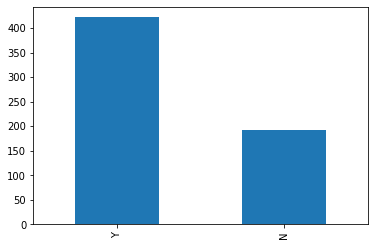

In [24]:
train['Loan_Status'].value_counts().plot.bar()

**Visualization**

**Independent Variable (Categorical)**

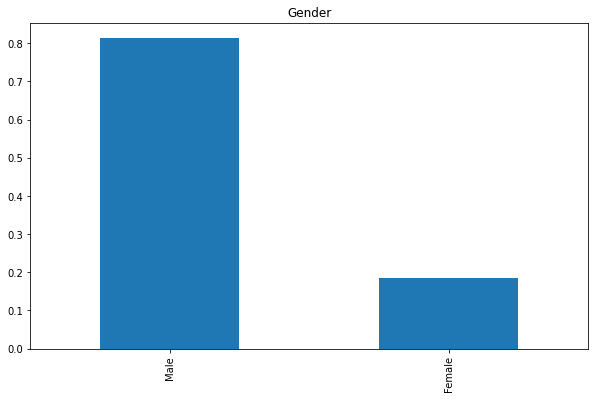

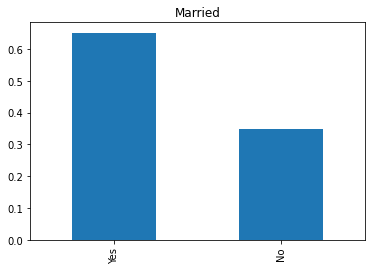

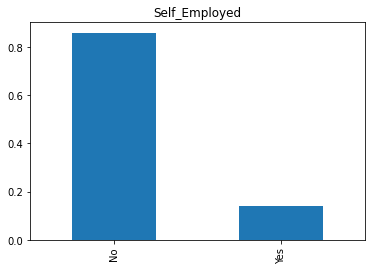

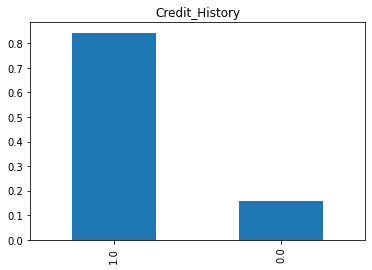

In [25]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,6), title='Gender')
plt.show()
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

Inferences from the above bar plots :
*   80% of applicants in the dataset are male.
*   Around 65% of the applicants in the dataset are married.
*   Around 15% of applicants in the dataset are self-employed.
*   Around 85% of applicants have repaid their debts.







**Independent Variable (Ordinal)**

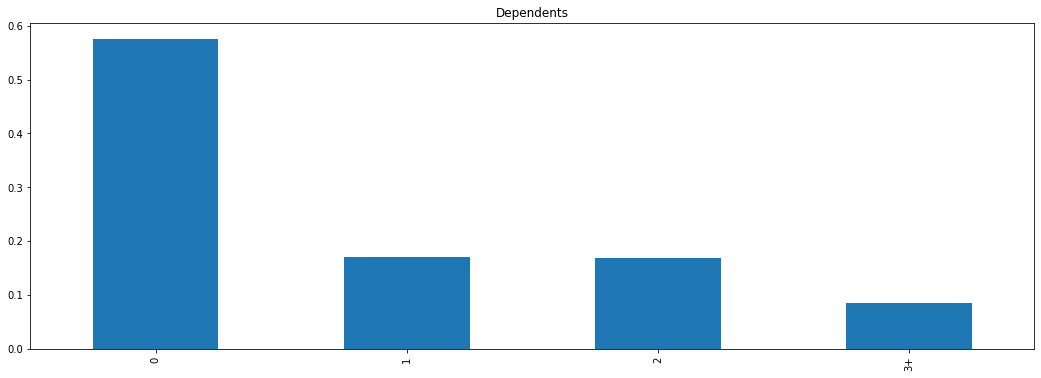

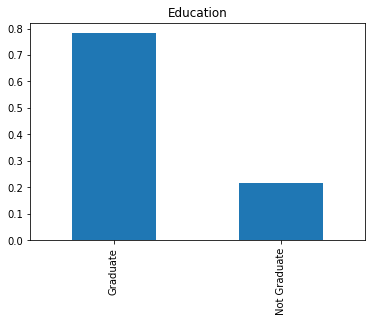

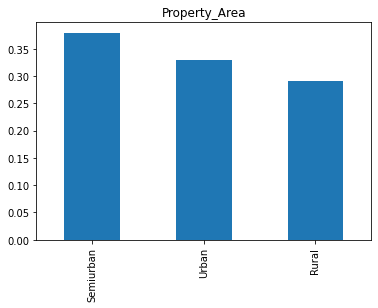

In [26]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(18,6), title='Dependents')
plt.show()
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

Inferences from the above bar plots :


*   Most of the applicants don't have any dependents.
*   Around 80% of the applicants are Graduate.
*   Most of the applicants are from the Semiurban area.



**Independent Variable (Numerical)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


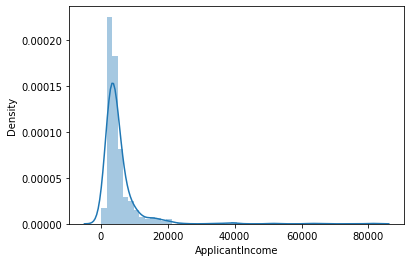

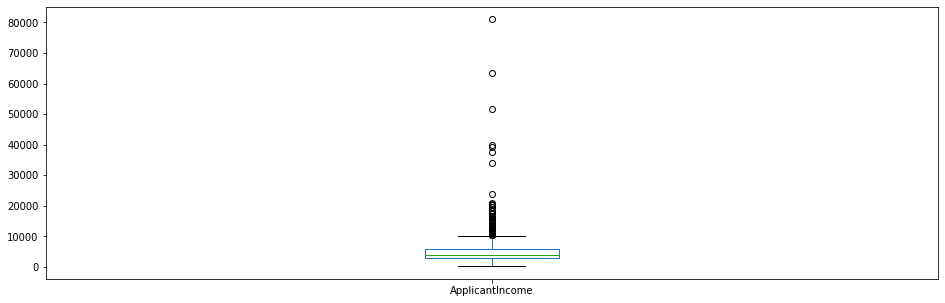

In [27]:
sns.distplot(train['ApplicantIncome'])
plt.show()
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()



*   The distribution of applicant income are towards the left which means it is not normally distributed.(Right skewed)
*   The boxplot confirms the presence of a lot of outliers/extreme values.
*   This can be attributed to the income disparity in the society.





/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

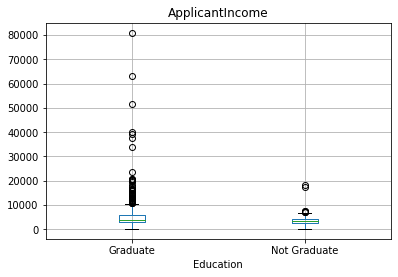

In [28]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

There are a higher number of graduates with very high incomes, which are appearing to be outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


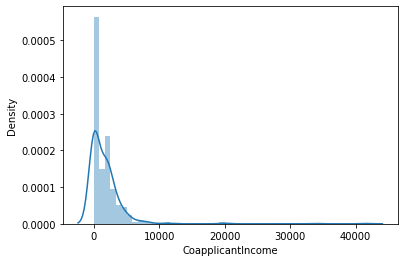

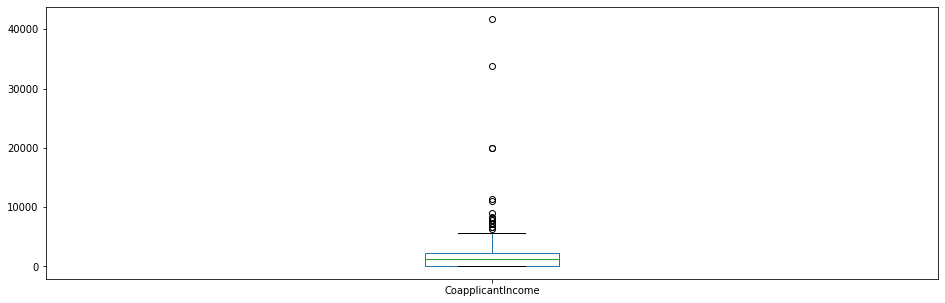

In [29]:
sns.distplot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

The majority of co-applicants income ranges from 0 to 5000. We also see a lot of outliers in the applicant's income and it is not normally distributed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


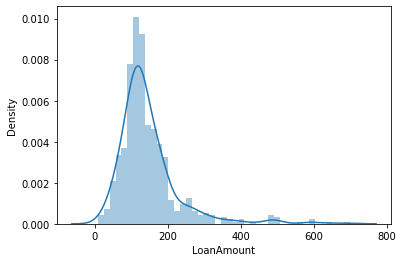

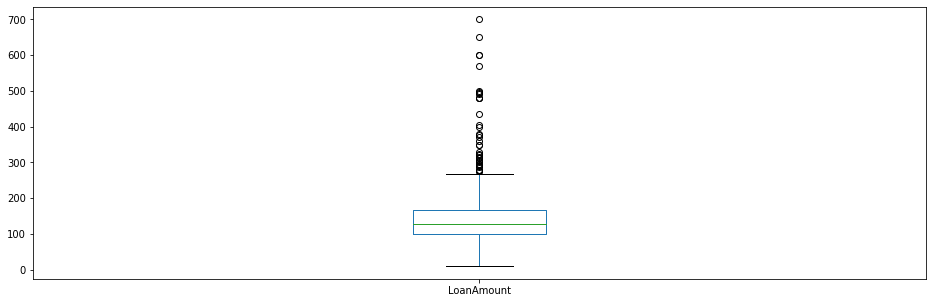

In [30]:
train.notna()
sns.distplot(train['LoanAmount'])
plt.show()
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

A lot of outliers in this variable and the distribution is fairly normal.

**Bivariate Analysis**

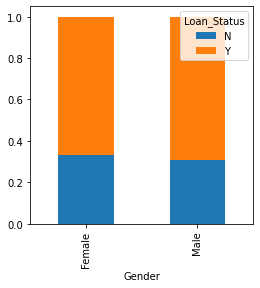

In [31]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

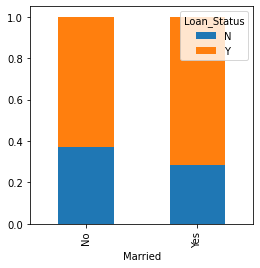

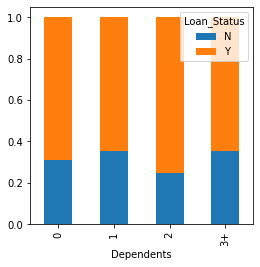

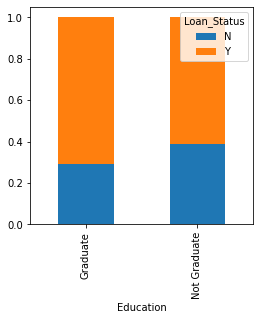

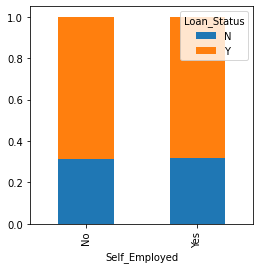

In [32]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

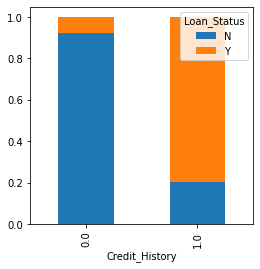

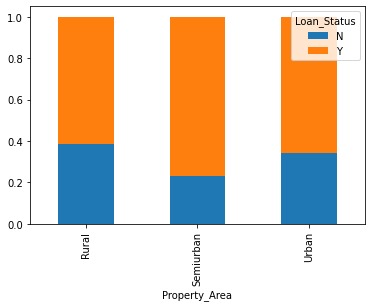

In [33]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()


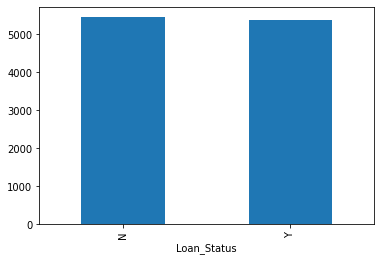

In [34]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

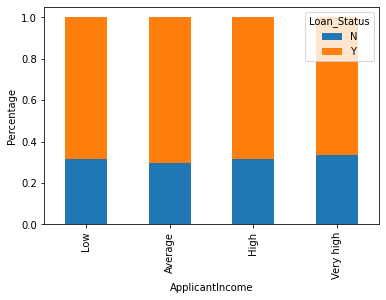

In [35]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

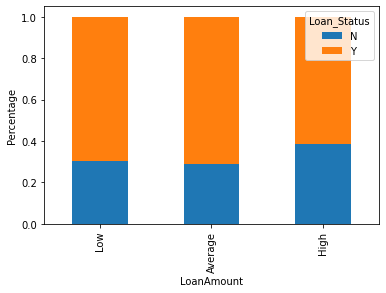

In [36]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

In [37]:
train=train.drop(['Income_bin', 'LoanAmount_bin'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

**Correlation matrix**

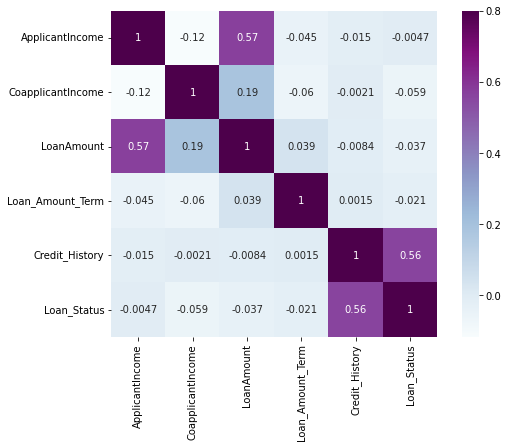

In [38]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

**Checking for missing values**

In [39]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Treating the missing value**

*   For numerical variables: imputation using mean or median
*   For categorical variables: imputation using mode

In [40]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [41]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

The value 360 in the 'Loan Amount Term' column appears the most frequently. So we will replace the missing values in this column using the mode of this variable.

In [42]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Use the median to fill the null values as earlier we saw that the loan amount has outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [43]:
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True) #changed from median to mean

In [44]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [45]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True) #changed from median to mean

**Outlier Treatment**

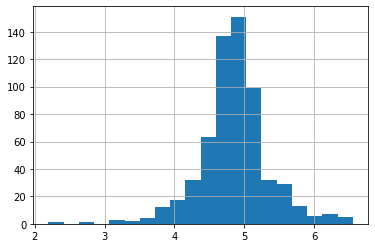

In [46]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


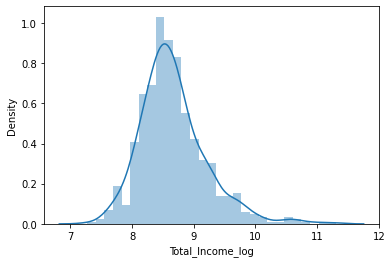

In [47]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
train['Balance Income'] = train['Total_Income']-(train['EMI'])
test['Balance Income'] = test['Total_Income']-(test['EMI'])
#sns.distplot(train['Balance Income'])

train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Balance_Income_log'] = np.log(test['Balance Income'])
train['Balance_Income_log'] = np.log(train['Balance Income'])
test['Emi_log'] = np.log(test['EMI'])
train['Emi_log'] = np.log(train['EMI'])


In [48]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,EMI,Balance Income,Total_Income_log,Balance_Income_log,Emi_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,4.986426,5849.0,0.406700,5848.593300,8.674026,8.673956,-0.899678
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,4.852030,6091.0,0.355556,6090.644444,8.714568,8.714509,-1.034074
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,4.189655,3000.0,0.183333,2999.816667,8.006368,8.006306,-1.696449
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,4.787492,4941.0,0.333333,4940.666667,8.505323,8.505256,-1.098612
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,4.948760,6000.0,0.391667,5999.608333,8.699515,8.699449,-0.937344


We can drop Loan_ID column as it will not give any specific information during model building. We have derived few features so we can remove other features which were used to create them.

In [49]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Total_Income','Balance Income','EMI'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Total_Income','Balance Income','EMI'], axis=1)

In [50]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income_log,Balance_Income_log,Emi_log
0,Male,No,0,Graduate,No,1.0,Urban,1,4.986426,8.674026,8.673956,-0.899678
1,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,8.714568,8.714509,-1.034074
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,8.006368,8.006306,-1.696449
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4.787492,8.505323,8.505256,-1.098612
4,Male,No,0,Graduate,No,1.0,Urban,1,4.948760,8.699515,8.699449,-0.937344


In [51]:
train.isnull().sum()
train.dropna(inplace=True)

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the training dataset and save it in another dataset.

In [52]:
X = train.drop('Loan_Status',axis=1)
y = train.Loan_Status

Using dummy variables to convert string-format categorical variables to numeric values.

In [53]:
X = pd.get_dummies(X,drop_first=True)
train=pd.get_dummies(train,drop_first=True)
test=pd.get_dummies(test,drop_first=True)

In [54]:
train.head()

,Credit_History,Loan_Status,LoanAmount_log,Total_Income_log,Balance_Income_log,Emi_log,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,4.986426,8.674026,8.673956,-0.899678,1,0,1,0,0,0,0,0,1
1,1.0,0,4.852030,8.714568,8.714509,-1.034074,1,1,0,1,0,0,0,0,0
2,1.0,1,4.189655,8.006368,8.006306,-1.696449,1,1,1,0,0,0,1,0,1
3,1.0,1,4.787492,8.505323,8.505256,-1.098612,1,1,1,0,0,1,0,0,1
4,1.0,1,4.948760,8.699515,8.699449,-0.937344,1,0,1,0,0,0,0,0,1


In [55]:
train['Emi_log'].value_counts()

-1.098612    19
-0.899678    19
-1.185624    17
-1.280934    13
-0.810930    11
             ..
-0.028171     1
 0.716678     1
 1.459906     1
-0.136711     1
 0.303186     1
Name: Emi_log, Length: 240, dtype: int64

In [56]:
train.drop('Loan_Status',axis=1,inplace=True)

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train,y, test_size=0.3)

**1. Logistic Regression Model**

Import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Predict the Loan_Status for validation set and calculate its accuracy.

In [64]:
pred_test = model.predict(x_test)
accuracy_score(y_test,pred_test)

0.8432432432432433

In [65]:
train.shape

(614, 14)

**Predicting for the test dataset**

In [67]:
pred_test1 = model.predict(test)

**Importing the submission file**

In [68]:
submission = pd.read_csv('/content/sample_submission_49d68Cx.csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [69]:
submission['Loan_Status']=pred_test1
submission['Loan_ID']=test_original['Loan_ID']

**We need predictions in Y and N. So let’s convert 1 and 0 to Y and N.**

In [70]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

**Convert the submission to .csv format**

In [71]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic_loan_prediction.csv')

**2. Neural network**

In [78]:
import tensorflow as tf
tf.random.set_seed(2021)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='relu',input_shape=(x_train.shape[1], )), 
    tf.keras.layers.Dense(4, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=['accuracy'])

print(model.summary())

history = model.fit( x_train,y_train,validation_data=(x_test,y_test),
                    verbose=2,epochs=500)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 90        
                                                                 
 dense_7 (Dense)             (None, 4)                 28        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
14/14 - 1s - loss: 0.8655 - accuracy: 0.6830 - val_loss: 0.6169 - val_accuracy: 0.6973 - 591ms/epoch - 42ms/step
Epoch 2/500
14/14 - 0s - loss: 0.6108 - accuracy: 0.6830 - val_loss: 0.6130 - val_accuracy: 0.6973 - 38ms/epoch - 3ms/step
Epoch 3/500
14/14 - 0s - loss: 0.6100 - accuracy: 0.6830 - val_loss

Checking the accuracy of neural network model

In [72]:
from sklearn.metrics import accuracy_score
#predict_classes = model.predict_classes(X_test)
predict_classes=model.predict(x_test) 
acc = accuracy_score(y_test,predict_classes.round())
print(f"Accuracy: {acc}")

Accuracy: 0.8378378378378378


**3. XGBoost classifier**

In this algorithm, decision trees are created in sequential form. Weights play an important role in XGBoost. Weights are assigned to all the independent variables which are then fed into the decision tree which predicts results. Weight of variables predicted wrong by the tree is increased and these the variables are then fed to the second decision tree. These individual classifiers/predictors then ensemble to give a strong and more precise model. It can work on regression, classification, ranking, and user-defined prediction problems.

In [73]:
x_train.shape, y_train.shape

((429, 14), (429,))

In [74]:
from xgboost import XGBClassifier
lr_range = [0.001,0.01,0.2,0.5,0.6,1]
n_est_range = [30,70,100,120,150]
depth_range = [3,4,5,6,7,8,9]

parameters = dict(learning_rate=lr_range,
                  n_estimators=n_est_range,
                  max_depth=depth_range)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
kfold = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

clf = XGBClassifier(random_state=2020)
rcv = RandomizedSearchCV(clf, param_distributions=parameters,
                  cv=kfold,scoring='roc_auc',n_iter=15,random_state=2020)

rcv.fit(x_train, y_train)
df_rcv = pd.DataFrame(rcv.cv_results_)
print(rcv.best_params_)

print(rcv.best_score_)

{'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.01}
0.74069184300774


**4. Using Stacking method (Ensemble learning methods)**

Stacking is a way of ensembling classification or regression models it consists of two-layer estimators. The first layer consists of all the baseline models that are used to predict the outputs on the test datasets. The second layer consists of Meta-Classifier or Regressor which takes all the predictions of baseline models as an input and generate new predictions.

In [75]:
logreg = LogisticRegression( max_iter=100)

from sklearn.svm import SVC
svc = SVC(probability = True,kernel='rbf',random_state=2020)

from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42,max_depth = 4)

from sklearn.ensemble import StackingClassifier
models_considered = [('Logistic Regression', logreg),
                     ('SVM', svc),('Naive Bayes',gaussian),
                     ('Decision Tree',dtc)]

stack = StackingClassifier(estimators = models_considered,
                           final_estimator=clf,
                           stack_method="predict_proba",
                           passthrough=True)

stack.fit(x_train, y_train)

y_pred_prob = stack.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_prob))

print('Accuracy score', accuracy_score(y_pred_prob.round(),y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8165143964562569
Accuracy score 0.8054054054054054


**5. Stochastic Gradient descent classifier**

In [76]:
#importing libraries
from sklearn import linear_model

SGDClf = linear_model.SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet")
SGDClf.fit(x_train,y_train)
y_pred = SGDClf.predict(x_test)
print('SGDClassifier Model Accuracy : ', accuracy_score(y_pred,y_test))

SGDClassifier Model Accuracy :  0.827027027027027


**6. Bagging method(Ensembled machine learning)**

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.
Each base classifier is trained in parallel with a training set which is generated by randomly drawing, with replacement, N examples(or data) from the original training dataset – where N is the size of the original training set. Training set for each of the base classifiers is independent of each other. Many of the original data may be repeated in the resulting training set while others may be left out.

Bagging reduces overfitting (variance) by averaging or voting, however, this leads to an increase in bias, which is compensated by the reduction in variance though.

In [77]:
from sklearn.ensemble import BaggingClassifier

model_bg = BaggingClassifier(random_state=2021,oob_score=True,
                             max_features=x_train.shape[1],
                             n_estimators=15,
                             max_samples=x_train.shape[0])

model_bg.fit(x_train,y_train)

print("Out of Bag Score = " + "{:.4f}".format(model_bg.oob_score_))

y_pred = model_bg.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

Out of Bag Score = 0.7110
[[ 33  23]
 [ 13 116]]
              precision    recall  f1-score   support

           0       0.72      0.59      0.65        56
           1       0.83      0.90      0.87       129

    accuracy                           0.81       185
   macro avg       0.78      0.74      0.76       185
weighted avg       0.80      0.81      0.80       185

0.8054054054054054


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


We created and tested several models, and the '**Logistic regression**' model outperformed the others.